# 은긍코치_07팀 2주차 미션 제출 (22/11/08)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

###  📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [56]:
age_code = { 1: '0~4세',
             2: '5~9세',
             3: '10~14세',
             4: '15~19세',
             5: '20~24세',
             6: '25~29세',
             7: '30~34세',
             8: '35~39세',
             9: '40~44세',
             10: '45~49세',
             11: '50~54세',
             12: '55~59세',
             13: '60~64세',
             14: '65~69세',
             15: '70~74세',
             16: '75~79세',
             17: '80~84세',
             18: '85세+'}

In [6]:
pd.pivot_table(df, index=["연령대코드(5세단위)"], values="허리둘레", aggfunc="describe").rename(index=age_code)
df.groupby(["연령대코드(5세단위)"])["허리둘레"].describe().rename(index=age_code)

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


### 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [10]:
# 상관계수
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<AxesSubplot: >

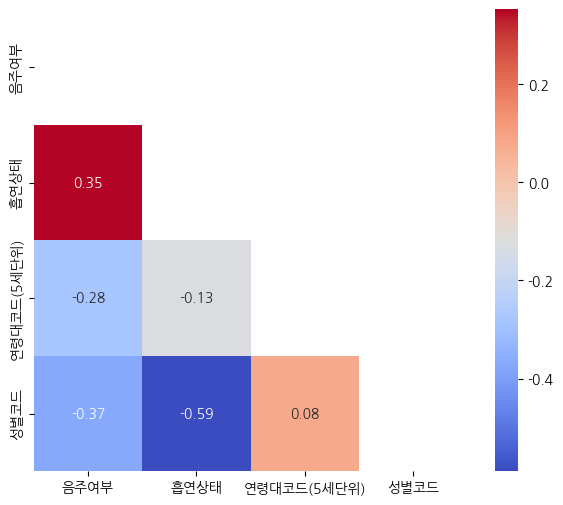

In [8]:
#시각화
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(7, 6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

### 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

<AxesSubplot: xlabel='흡연', ylabel='count'>

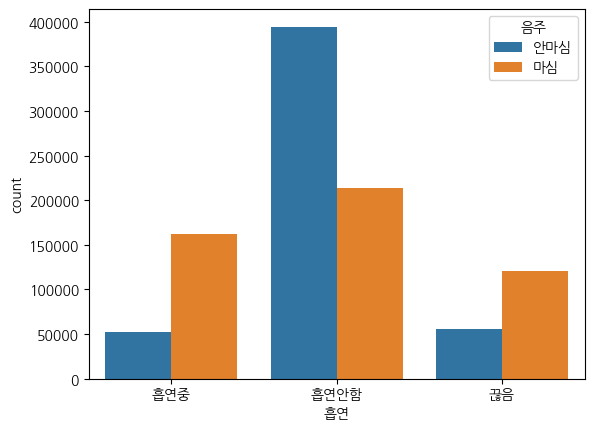

In [11]:
pd.crosstab(df["음주여부"],df['흡연상태'])

# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df["흡연"]=df["흡연상태"].replace(smoke)
df["음주"]=df["음주여부"].replace(drink)

sns.countplot(data=df, x="흡연", hue="음주")

### 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

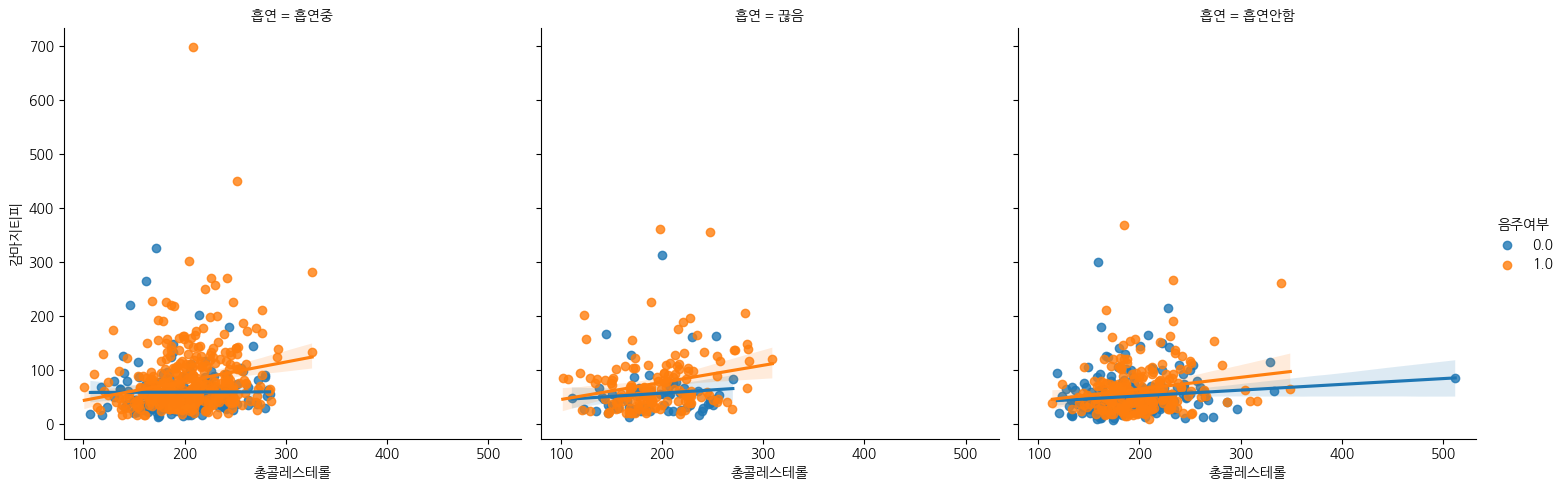

In [15]:
sns.lmplot(data=df[df["체중(5Kg 단위)"] >= 120], x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연");

### 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!   
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.   
* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!   
* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요!   
* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [21]:
#실명 데이터를 제외한 평균 좌우 시력 구하기.

lefteye = (df["시력(좌)"] != 9.9)
righteye = (df["시력(우)"] != 9.9)

df_vision = df[lefteye&righteye]
df_vision.head(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,흡연안함,안마심


<AxesSubplot: xlabel='시력(우)', ylabel='연령대'>

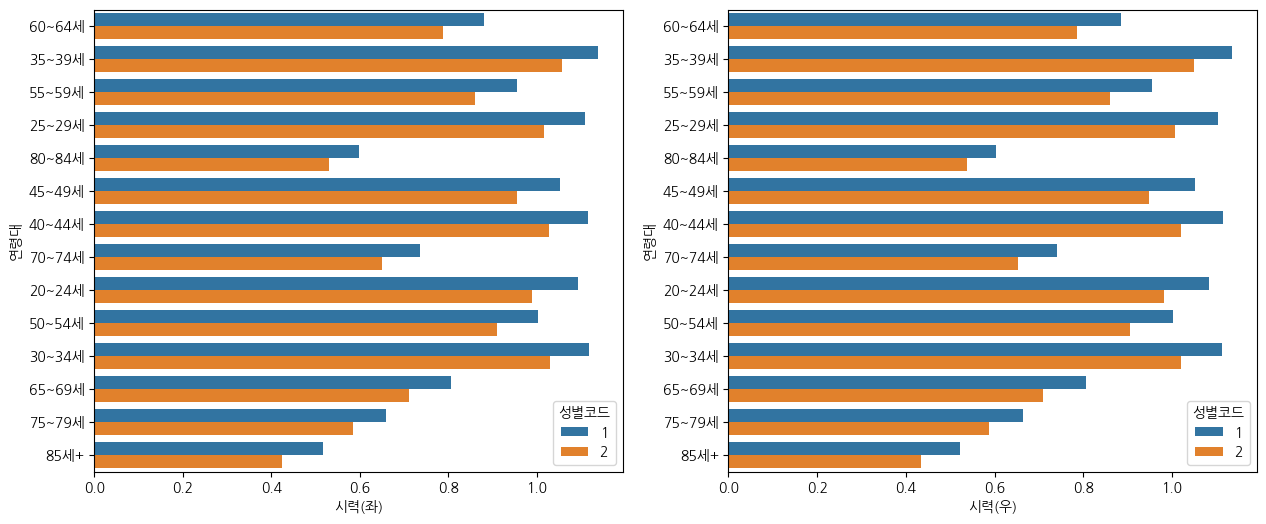

In [57]:
#서브플롯을 이용한 시각화
df_vision["연령대"] = df_vision["연령대코드(5세단위)"].replace(age_code)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.barplot(x="시력(좌)", y="연령대", hue="성별코드", data=df_vision, errorbar=None, ax=axes[0])
sns.barplot(x="시력(우)", y="연령대", hue="성별코드", data=df_vision, errorbar=None, ax=axes[1])